In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, neighbors, metrics

N = 100
K = 10

In [167]:
iris = datasets.load_iris()

In [168]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [169]:
feature_names_iris = iris.feature_names
target_names_iris = iris.target_names
target_iris = iris.target
df_iris = pd.DataFrame(iris.data)

In [170]:
df_iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [171]:
df_iris.columns = feature_names_iris
df_iris['target'] = target_iris
df_iris['target_name'] = df_iris['target'].apply(lambda x: target_names_iris[x])

In [172]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [173]:
train_df_iris, test_df_iris, train_target_iris, test_target_iris = \
  model_selection.train_test_split(
      df_iris.iloc[:,0:4],
      df_iris.iloc[:,4],
      train_size=0.8,
      random_state=42
  )

In [174]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(train_df_iris, train_target_iris)
predict = knn.predict(test_df_iris)

acc = metrics.accuracy_score(test_target_iris, predict)
print(acc)

1.0


## Avaliação para N combinações KNN + hiper-parâmetros

In [175]:
acc_mean_list = []
k_list = []
for k in range(2, K):
  acc_list = []
  for i in range(N):
    train_df_iris, test_df_iris, train_target_iris, test_target_iris = \
      model_selection.train_test_split(
          df_iris.iloc[:,0:4],
          df_iris.iloc[:,4],
          train_size=0.8
      )

    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_df_iris, train_target_iris)
    predict = knn.predict(test_df_iris)

    acc = metrics.accuracy_score(test_target_iris, predict)
    acc_list.append(acc)
  acc_mean_list.append(np.array(acc_list).mean())
  k_list.append(k)

In [176]:
acc_list = np.array(acc_list)
print(acc_list.mean())
print(acc_list.std())

0.9650000000000003
0.029953667926019042


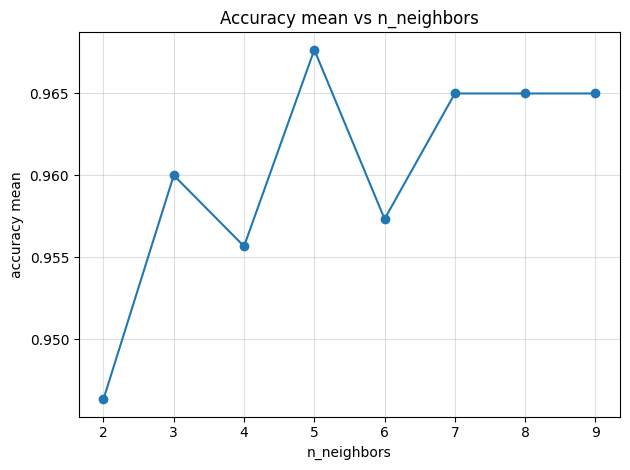

In [181]:
x = k_list
y = acc_mean_list

plt.plot(x, y, marker='o')
plt.grid(alpha=0.4)
plt.title('Accuracy mean vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy mean')

plt.tight_layout()
plt.show()